In [231]:
#-*- coding: utf-8 -*-#

# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(8)

# Matplotlib and seaborn for plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 24
matplotlib.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import geopy.distance

import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [5]:
pip install plotly

     --------------------------------------- 15.2/15.2 MB 12.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [232]:
df = pd.read_csv("D:\\Dissertation\\hermes\\parcels.csv", sep=',')
#df_mc=pd.read_csv("D:\\Dissertation\\hermes\\Portsmouth_6MC.csv", sep=',')

In [233]:
#df = df.loc[:,['Latitude','Longitude']]
colnames=['Latitude', 'Longitude','NAME' ]
facility_points=pd.read_csv("D:\\Dissertation\\hermes\\Portsmouth_6MC.csv",names=colnames, sep=',')

In [234]:
def check_missing_data(df):
    # missing data
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))

In [235]:
facility_points['Latitude'][0]

50.847806

In [236]:
df.describe()

,Latitude,Longitude,kg,litres
count,6196.000000,6196.000000,6196.000000,6196.000000
mean,50.813029,-1.071863,0.807543,8.179502
std,0.022068,0.016824,1.025692,10.286156
min,50.779225,-1.117188,0.000005,0.000213
25%,50.793305,-1.082967,0.125167,1.281011
50%,50.809608,-1.072070,0.429073,4.413900
75%,50.829450,-1.060637,1.101786,11.120618
max,50.855310,-1.023221,8.607204,87.547215


In [237]:
df=df.groupby(['Latitude','Longitude']).size().reset_index(name='demand') 
df=df[['Latitude','Longitude']]

Text(0.5, 1.0, 'Graph for Location of customers and given micro consolidation point')

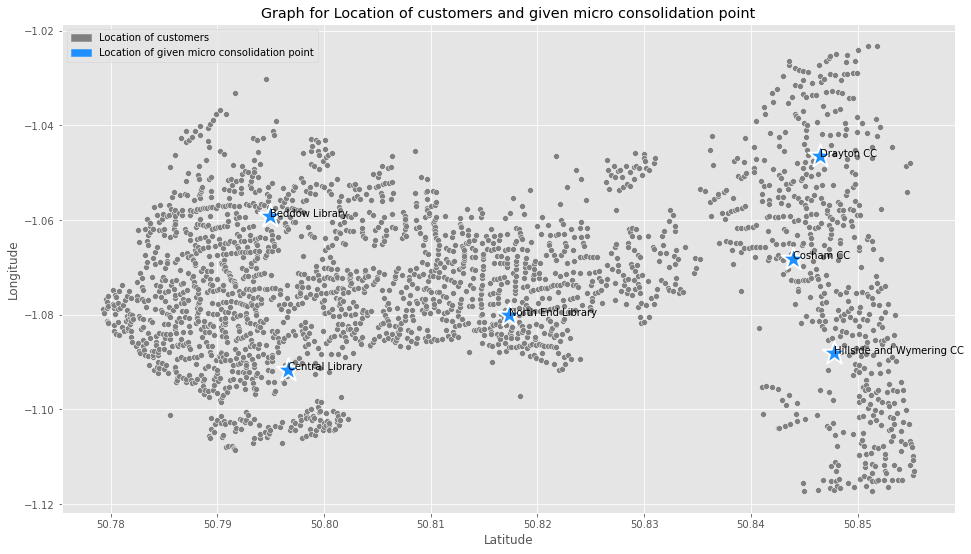

In [238]:
import matplotlib.patches as mpatches
ax = sns.scatterplot(x="Latitude", y="Longitude", data=df,color='grey')
ax = sns.scatterplot(x="Latitude", y="Longitude", data=facility_points,s=600,marker='*',color='dodgerblue')
for i in range(0,len(facility_points['Latitude'])):
    plt.text(facility_points['Latitude'][i],facility_points['Longitude'][i],facility_points['NAME'][i],color='Black')
gray_patch = mpatches.Patch(color='grey', label='Location of customers')
blue_patch = mpatches.Patch(color='dodgerblue', label='Location of given micro consolidation point')
plt.legend(handles=[gray_patch,blue_patch])
plt.title(label="Graph for Location of customers and given micro consolidation point",color="Black")

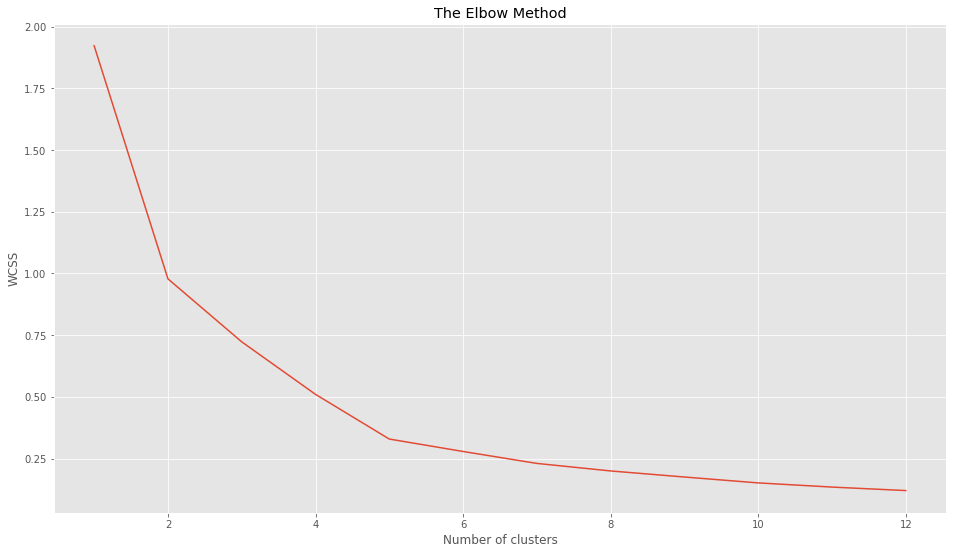

In [239]:
wcss = []

for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
    kmeans.fit(df)
    wcss.append (kmeans.inertia_)

plt.plot(range(1, 13), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
elbow_dataframe =pd.DataFrame()
elbow_dataframe['number_of_cluster']=[i for i in range(1,13)]
elbow_dataframe['WCSS']=wcss

In [240]:
elbow_dataframe

,number_of_cluster,WCSS
0,1,1.922501
1,2,0.978176
2,3,0.722984
3,4,0.510110
4,5,0.329046
5,6,0.278660
6,7,0.230297
7,8,0.199753
8,9,0.175150
9,10,0.151325


In [241]:
Kmean = KMeans(n_clusters=10)
Kmean.fit(df)

KMeans(n_clusters=10)

In [242]:
df

,Latitude,Longitude
0,50.779225,-1.078916
1,50.779321,-1.079666
2,50.779550,-1.076754
3,50.779600,-1.077406
4,50.779639,-1.078681
...,...,...
2385,50.855064,-1.108011
2386,50.855168,-1.109955
2387,50.855192,-1.110693
2388,50.855198,-1.113804


In [243]:
Kmean.cluster_centers_

array([[50.85029978, -1.10574733],
       [50.80377746, -1.0785632 ],
       [50.84888581, -1.08038641],
       [50.78751287, -1.07820288],
       [50.7936362 , -1.05662031],
       [50.84659455, -1.03649835],
       [50.79319385, -1.09630786],
       [50.82096603, -1.07895727],
       [50.81442862, -1.0642602 ],
       [50.8402447 , -1.05847439]])

In [246]:
count=1
Facilities=[]
for i in Kmean.cluster_centers_:
    #stringconc='c'+str(count)
    vars()['c'+str(count)]=[i[0],i[1]]
    Facilities.append([i[0],i[1]])
    #print(vars()['c'+str(count)])
    count=count+1

In [247]:
Facilities

[[50.85029977777778, -1.1057473333333334],
 [50.803777462633455, -1.0785632028469752],
 [50.84888581300813, -1.0803864146341464],
 [50.787512874301676, -1.0782028798882681],
 [50.79363620441989, -1.0566203093922653],
 [50.846594549019606, -1.0364983529411764],
 [50.793193848, -1.096307864],
 [50.82096602826855, -1.0789572685512367],
 [50.814428616, -1.064260204],
 [50.84024470325203, -1.0584743943089432]]

In [248]:
def distance(x,y):
    #print(x)
    #print(y)
    coords_1 = x
    coords_2 = y
    return geopy.distance.geodesic(coords_1, coords_2).km

In [249]:
Facilities

[[50.85029977777778, -1.1057473333333334],
 [50.803777462633455, -1.0785632028469752],
 [50.84888581300813, -1.0803864146341464],
 [50.787512874301676, -1.0782028798882681],
 [50.79363620441989, -1.0566203093922653],
 [50.846594549019606, -1.0364983529411764],
 [50.793193848, -1.096307864],
 [50.82096602826855, -1.0789572685512367],
 [50.814428616, -1.064260204],
 [50.84024470325203, -1.0584743943089432]]

In [250]:
from geopy.geocoders import Nominatim
location_name=[]
for i in Facilities:
    geolocator = Nominatim(user_agent="geoapiExercises")
    Latitude = str(i[0])
    Longitude = str(i[1])
    location = geolocator.reverse(Latitude+","+Longitude)
    location_name.append(str(location).split("(")[0])
 
# Display
#print(location_name)
facility_dataframe=pd.DataFrame(Facilities,columns=['Facility_Latitude','Facility_Longitude'])
facility_dataframe['Address']=location_name

In [251]:
pd.set_option('display.max_colwidth', None)
facility_dataframe['Facility_Representation']=facility_dataframe.index
facility_dataframe

,Facility_Latitude,Facility_Longitude,Address,Facility_Representation
0,50.850300,-1.105747,"Newbolt Road, Port Solent, Portsmouth, England, PO6 4JQ, United Kingdom",0
1,50.803777,-1.078563,"Bill Sargent Crescent, Fratton, Portsmouth, England, PO1 4JP, United Kingdom",1
2,50.848886,-1.080386,"Clacton Road, Wymering, Paulsgrove, Portsmouth, England, PO6 3QX, United Kingdom",2
3,50.787513,-1.078203,"Wish Place, Southsea, Portsmouth, England, PO5 2SA, United Kingdom",3
4,50.793636,-1.056620,"Cromarty Avenue, Milton, Portsmouth, England, PO4 8JH, United Kingdom",4
5,50.846595,-1.036498,"Alexandra Rose Residential Care Home, 358, Havant Road, Farlington, Portsmouth, England, PO6 1NE, United Kingdom",5
6,50.793194,-1.096308,"Dental Academy, Hampshire Terrace, Old Portsmouth, Portsmouth, England, PO1 2QY, United Kingdom",6
7,50.820966,-1.078957,"33, Wadham Road, North End, Hilsea, Portsmouth, England, PO2 9ED, United Kingdom",7
8,50.814429,-1.064260,"Copnor Primary School, Copnor Road, Copnor, Baffins, Portsmouth, England, PO3 5BZ, United Kingdom",8
9,50.840245,-1.058474,"Dovercourt Road, Cosham, Portsmouth, England, PO6 2UH, United Kingdom",9


In [252]:
Latitude=df["Latitude"].tolist()
Longitude=df["Longitude"].tolist()
#Facilities=[[50.847806,-1.088163],[50.794942,-1.059197],[50.846475,-1.04657],[50.817339,-1.080083],[50.796638,-1.091671],[50.843917,-1.06817]]

In [253]:
from pulp import*

from itertools import combinations

2101.8683573073104
       Latitude  Longitude  facility  Facility_Latitude  Facility_Longitude  \
0     50.779225  -1.078916         1          50.787635           -1.078253   
1     50.779321  -1.079666         1          50.787635           -1.078253   
2     50.779550  -1.076754         1          50.787635           -1.078253   
3     50.779600  -1.077406         1          50.787635           -1.078253   
4     50.779639  -1.078681         1          50.787635           -1.078253   
...         ...        ...       ...                ...                 ...   
2385  50.855064  -1.108011         4          50.850300           -1.105747   
2386  50.855168  -1.109955         4          50.850300           -1.105747   
2387  50.855192  -1.110693         4          50.850300           -1.105747   
2388  50.855198  -1.113804         4          50.850300           -1.105747   
2389  50.855310  -1.113121         4          50.850300           -1.105747   

                                

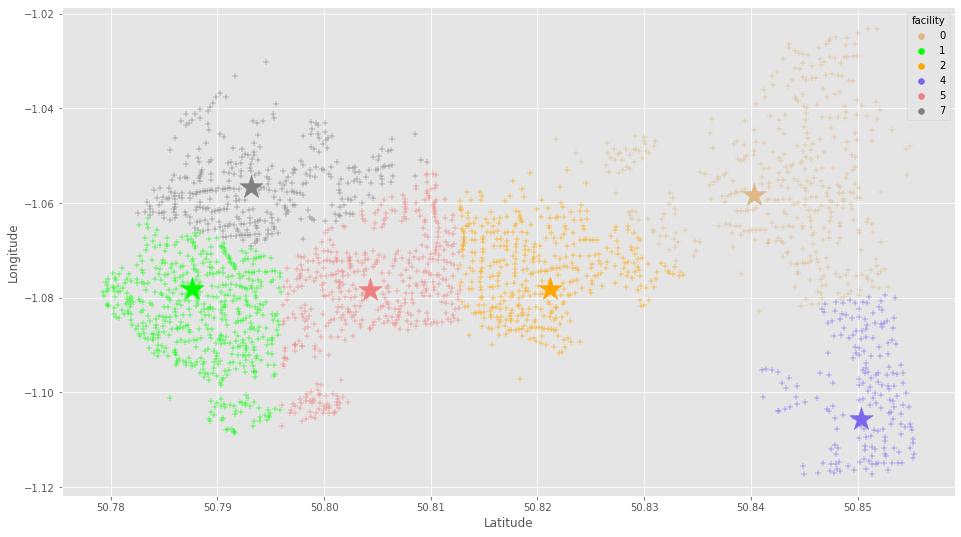

In [206]:
minobjective=10000000000000
count=0
facility=[]
objectiveval=[]
for i in range(6,7):
     commlist=list(combinations(Facilities,i))
     for j in range(0,len(commlist)):
         new_distance_array = np.zeros( (i, len(Latitude)))
         newfacilities=commlist[j]
         for k in range(0,len(newfacilities)):
             #print(newfacilities)
             for m in range(0,len(Latitude)):
                 new_distance_array[k][m]=distance((Latitude[m],Longitude[m]),(newfacilities[k][0],newfacilities[k][1])) 
         listofvariable=[]
         for n in range(1,len(newfacilities)+1):
            vars()['x_'+str(n)]=LpVariable('x_'+str(n),cat="Binary")
            listofvariable.append(vars()['x_'+str(n)])
         x_vars = LpVariable.dicts("Y", [(s,p) for s in range(0,len(newfacilities))  for p in range(0,len(Latitude))] , cat='Binary')
         #Define the problem
         Problem=LpProblem("facility allocation problem",LpMinimize)
         #objective function
         Problem+=lpSum(s for s in listofvariable )+lpSum(x_vars[j,p]*new_distance_array[j][p] for j in range(0,len(newfacilities)) for p in range(0,len(Latitude)))
         #constraints
         #1
         Problem+=lpSum(s for s in listofvariable )>=1
         Problem+=lpSum(s for s in listofvariable )<=len(listofvariable)
         #2
         for p in range(0,len(Latitude)):
            Problem+=lpSum(x_vars[j,p] for j in range(0,len(listofvariable))) ==1
    
         #3
         for x in range(0,len(listofvariable)):
            Problem+=lpSum(x_vars[x,p] for p in range(0,len(Latitude))) <=len(Latitude)*listofvariable[x]
            Problem+=lpSum(x_vars[x,p] for p in range(0,len(Latitude))) >=listofvariable[x]
            
         #4
         Problem+=lpSum(x_vars[s,p] for s in range(0,len(listofvariable))  for p in range(0,len(Latitude)))==len(Latitude)
         Problem.solve() 
         #print('Status :',LpStatus[Problem.status])
         #print(value(Problem.objective))
         
         if minobjective>value(Problem.objective):
            choosenfacility=newfacilities
            minobjective=value(Problem.objective)
            list1=[]
            list2=[]
            for s in Problem.variables():
                if s.varValue==1 and s.name not in ['x_1','x_2','x_3','x_4','x_5','x_6']:
                    facility1=choosenfacility[int(s.name[:-1].split("_")[1][1:2])]
                    facility=Facilities.index(facility1)
                    demandpoint=s.name[:-1].split("_")[2]
                    list1.append([demandpoint,facility])
            dfnew = pd.DataFrame (list1, columns = ['demandpoint', 'facility'])
            dfnew.demandpoint=dfnew.demandpoint.astype('int64')
            dfnew.facility=dfnew.facility.astype('int64')
            dfnew=dfnew.sort_values('demandpoint').set_index('demandpoint')
            
     print(minobjective)
     count=count+1
     dffianl=df.join(dfnew)
     dffianl=pd.merge(dffianl, facility_dataframe, left_on='facility', right_on='Facility_Representation')
     print(dffianl)
     x=sorted(dffianl['facility'].unique())
     print(x)
     colour=['burlywood','lime','orange','mediumslateblue','lightcoral','gray']
     #colourcombination=[colour[i] for i in x]
     dictcolour={}
     for col in range(0,len(x)):
         dictcolour[col]=colour[col]
     fig, ax = plt.subplots()
     c=sns.color_palette(colour, n_colors=len(x))
     sns.scatterplot(dffianl['Latitude'], dffianl['Longitude'], c=dffianl['facility'],hue=dffianl['facility'],marker="+",palette=c)
     for col in range(0,len(x)):
         plt.scatter(Facilities[x[col]][0], Facilities[x[col]][1], marker='*', s=600, c=colour[col])

     plt.show()
        